# CustomOCR Showcase:

## Introduction:
This notebook will show how to apply CustomOCR onto images and visualize the model's results. For this demonstration, we'll be using the `custom_ocr.py` module to extract the words from a given image and use `opencv` to display the predicted words alongside the original image.

This isn't a technical demonstration and more of a practical showcase. Please look into the other notebooks stored in `demos` for more information on how individual aspects in CustomOCR works.

# Import Packages:
The packages below are used to compile the notebook.

In [1]:
import CustomOCR.custom_ocr as ocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Apply CustomOCR:

## Case Insensitive:
For this example, we'll load in the `airport_sign.jpg` as an image array and predict the words using the case insensitive model.

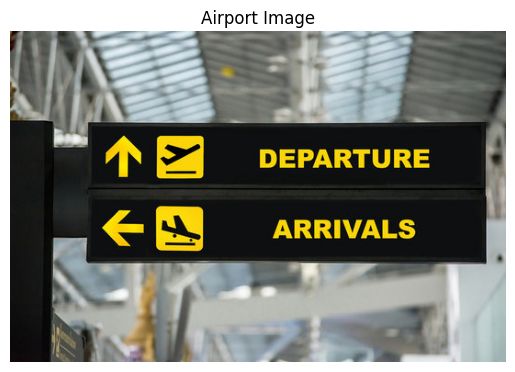

In [2]:
## Load in image using PIL Image.
## You can also change the file path to another image.
airport_img = Image.open('.\\datasets\\images\\airport_sign.jpg')

## Convert image to an image array.
airport_img = np.array(airport_img)

## Display the original airport image.
plt.imshow(airport_img)
plt.title("Airport Image")
plt.axis('off')
plt.show()

In [3]:
## Get the words and the bounding box coordinates for all detected words in image using CustomOCR.
air_pred_words, air_box_coords = ocr.CustomOCR(airport_img, case_sensitive = False).extract_text()

Predicting Word 1:

1/1 [==============================] - 0s 11ms/step
Predicting Word 2:

1/1 [==============================] - 0s 11ms/step
Finished Predictions!


In [4]:
## Print the words detected by the CustomOCR model.
print(f'Predicted Word 1: {air_pred_words[0]}')
print(f'Predicted Word 2: {air_pred_words[1]}')

Predicted Word 1: DEPARTURE
Predicted Word 2: ARRIVALS


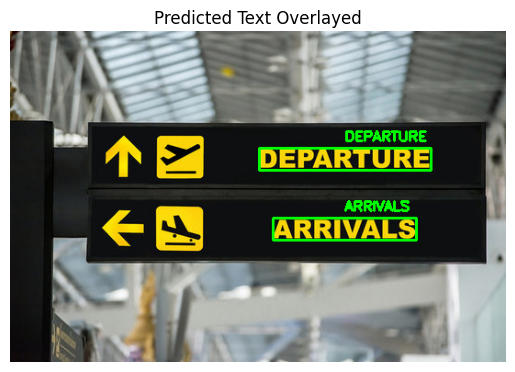

In [5]:
## Overlay the predicted words over the original image.
## For each predicted word, overlay on top of the original image.
for pair in list(zip(air_pred_words, air_box_coords)):
    ## Draw the bounding box over detected word.
    cv2.polylines(airport_img, [pair[1].astype(int)], True, (0, 255, 0), 2)

    ## Get the center for the bounding boxes.
    center_x = int(np.mean(pair[1][:, 0]))
    center_y = int(np.mean(pair[1][:, 1]))

    ## Get the coordinates for the text.
    text_x = center_x
    text_y = center_y - 20
    
    ## Define the properties of text.
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 2
    text_x = max(text_x, 0)
    text_y = max(text_y, 20)

    ## Put text alongside the bounding boxes.
    cv2.putText(airport_img, pair[0], (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness)

## Plot the overlayed image.
plt.imshow(airport_img)
plt.title("Predicted Text Overlayed")
plt.axis('off')
plt.show()

## Case Sensitive:
We can also use the case sensitive option (the default setting). We'll load the `christmas.jpg` using its file directory and also specify that the words are darker than the background. 

In [6]:
## Establish the image path.
christmas_img_path = '.\\datasets\\images\\christmas.jpg'

## Get the words and the bounding box coordinates for all detected words in image using CustomOCR.
christmas_pred_words, christmas_box_coords = ocr.CustomOCR(christmas_img_path, text_bright = False, case_sensitive = True).extract_text()

Predicting Word 1:

1/1 [==============================] - 0s 11ms/step
Predicting Word 2:

1/1 [==============================] - 0s 11ms/step
Finished Predictions!


In [7]:
## Print the words detected by the CustomOCR model.
print(f'Predicted Word 1: {christmas_pred_words[0]}')
print(f'Predicted Word 2: {christmas_pred_words[1]}')

Predicted Word 1: DeCember
Predicted Word 2: 2O24


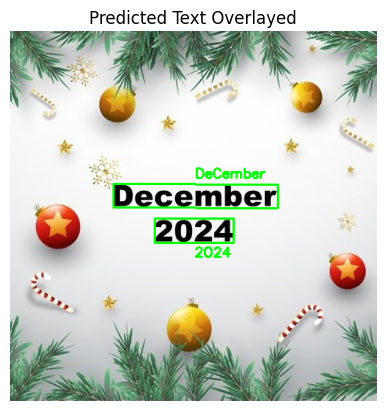

In [8]:
## Load in the image from the image path.
christmas_img = Image.open('.\\datasets\\images\\christmas.jpg')

## Convert image to an image array.
christmas_img = np.array(christmas_img)

## Overlay the predicted words over the original image.

## Initialize counter.
counter = 0

## For each predicted word, overlay on top of the original image.
for pair in list(zip(christmas_pred_words, christmas_box_coords)):
    ## Draw the bounding box over detected word.
    cv2.polylines(christmas_img, [pair[1].astype(int)], True, (0, 255, 0), 2)

    ## Get the center for the bounding boxes.
    center_x = int(np.mean(pair[1][:, 0]))
    center_y = int(np.mean(pair[1][:, 1]))

    ## Get the coordinates for the text.
    if counter == 0:
        text_x = center_x
        text_y = center_y - 25
    else:
        text_x = center_x
        text_y = center_y + 35
    
    ## Define the properties of text.
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.6
    font_thickness = 2
    text_x = max(text_x, 0)
    text_y = max(text_y, 20)

    ## Put text alongside the bounding boxes.
    cv2.putText(christmas_img, pair[0], (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness)

    ## Iterate counter variable.
    counter = counter + 1

## Plot the overlayed image.
plt.imshow(christmas_img)
plt.title("Predicted Text Overlayed")
plt.axis('off')
plt.show()